# Project 3 - What's cooking!

## Setup

### Imports

All the imports go here, to make it easier to find them later.

In [2]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Reding in the training file

In [3]:
data = pd.read_json('train.json') 
"""
print("An example of what the data looks like:")
print("")
print(data)

print("")
print("Here the number of recepies of each cuisine")
print("")
print(data['cuisine'].value_counts())
"""

'\nprint("An example of what the data looks like:")\nprint("")\nprint(data)\n\nprint("")\nprint("Here the number of recepies of each cuisine")\nprint("")\nprint(data[\'cuisine\'].value_counts())\n'

In [4]:
# The set of different cuisines
cuisines = data.cuisine.unique()

# To find the different ingredients, we need to clean them up a little. 
def clean(string) :
    s = string.replace('-',' ') # read low-fat the same as low fat
    s = string.replace('&', 'and') # read & and and as the same 
    s = re.sub('\((.*?)\)', '', s) # remove everythin g in brackets
    s = re.sub('\d{1,2}\%', '', s) # remove things of the form d% or dd%, where d is a digit
    s = ' '.join(s.split()) # remove extra white spaces
    
    return s

ing_list = data.ingredients.values.tolist()
raw_ingredients = [clean(x) for ing in ing_list for x in ing]

ingredients = sorted(set(raw_ingredients))
"""
print("There are %d different ingredients." % len(ingredients))
print("")
print("")
print("Here is the very long list:")
print("")
print(ingredients)
"""    

'\nprint("There are %d different ingredients." % len(ingredients))\nprint("")\nprint("")\nprint("Here is the very long list:")\nprint("")\nprint(ingredients)\n'

### Recipies as vectors

Here we have functions that take a list of incredients and produces a vector to represent them. 


In [5]:
# build a dictionary that to each ingredient assigns its index
ingredient_index = {}
for i in range(0,len(ingredients)) :
    ingredient_index[ingredients[i]] = i

# the same for cuisines 
cuisine_index = {}
for i in range(0, len(cuisines)) : 
    cuisine_index[cuisines[i]] = i 
    
def ingredients_to_vector(ings) :
    vect = np.zeros(len(ingredients))
    for ing in ings :
        vect[ingredient_index[clean(ing)]] = 1
        
    return vect

def cuisine_to_vector(cus) : 
    vect = np.zeros(20)
    vect[cuisine_index[cus]] = 1
    return vect

vect_list = [ingredients_to_vector(ing) for ing in ing_list]
target_list = [cuisine_to_vector(cus) for cus in data.cuisine.values.tolist()]

print(len(vect_list))
print(len(target_list))

print(vect_list[30064])
print(target_list[30064])


39774
39774
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
for t in random.sample(target_list, 20) :
    print(t)
    
print(cuisine_index)

## Split data

In [6]:
X = np.c_[vect_list]
Y = np.c_[target_list]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

print('Shape of x_train: '+ str(x_train.shape))
print('Shape of y_train: '+ str(y_train.shape))
print()
print('Shape of x_test: '+ str(x_test.shape))
print('Shape of y_test: '+ str(y_test.shape))

(39774, 6698)
(39774, 20)
Shape of x_train: (25455, 6698)
Shape of y_train: (25455, 20)

Shape of x_test: (7955, 6698)
Shape of y_test: (7955, 20)


## Alter the target data to output numbers instead of arrays

In [7]:
Y_num = np.zeros((Y.shape[0]))
for i in range(Y.shape[0]):
    Y_num[i] = np.argmax(Y[i])

print(Y_num)
    
x_train, x_test, y_train, y_test = train_test_split(X, Y_num, test_size = 0.2)

[ 0.  1.  2. ... 16.  8.  7.]


## Random Forests
Let's make some forests with different sizes!


In [ ]:
print('Starting training:')

for i in [1, 10, 20, 50, 100]:
    clf = RandomForestClassifier(n_estimators=i, max_depth=None, max_features=None,
                             verbose=True, n_jobs=8)
    clf.fit(x_train, y_train)
    print()
    print('Some guesses: ' + str(clf.predict(x_test[90:95])))
    print('Actual answers: ' + str(y_test[90:95]))
    
    print('Accuracy on test data when we have %s tree(s):' %i)
    print(clf.score(x_test, y_test))
    

## Predicting with more trees forest

In [23]:
print('Starting training:')

for i in [100, 150, 200, 250]:
    clf = RandomForestClassifier(n_estimators=i, max_depth=None, max_features=None,
                             verbose=True, n_jobs=8)
    clf.fit(x_train, y_train)
    print()
    print('Some guesses: ' + str(clf.predict(x_test[90:95])))
    print('Actual answers: ' + str(y_test[90:95]))
    
    print('Accuracy on test data when we have %s tree(s):' %i)
    print(clf.score(x_test, y_test))

Starting training:


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  9.1min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 21.8min finished


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


Some guesses: [ 6. 10.  1.  1.  3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 100 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


0.6756756756756757


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed: 31.0min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished



Some guesses: [ 6. 10.  1.  1.  3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 150 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.3s finished


0.6752985543683218


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 38.6min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed: 41.5min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s



Some guesses: [ 6. 10.  1.  1.  3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 200 tree(s):


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished


0.6732872407291012


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 39.0min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed: 52.7min finished


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished


Some guesses: [ 6. 10.  1.  1.  3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 250 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.6s finished


0.6736643620364551


## Now with the square root as n_features

In [24]:
print('Starting training:')

for i in [100, 150, 200, 250]:
    clf = RandomForestClassifier(n_estimators=i, max_depth=None,
                             verbose=True, n_jobs=8)
    clf.fit(x_train, y_train)
    print()
    print('Some guesses: ' + str(clf.predict(x_test[90:95])))
    print('Actual answers: ' + str(y_test[90:95]))
    
    print('Accuracy on test data when we have %s tree(s):' %i)
    print(clf.score(x_test, y_test))

Starting training:


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   37.6s finished



Some guesses: [ 6. 10.  1.  1.  3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 100 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


0.7088623507228159


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:   56.6s finished



Some guesses: [ 6. 10.  1.  1.  3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 150 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.4s finished


0.71024512884978


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished



Some guesses: [ 6. 10.  1.  1.  3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 200 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.6s finished


0.7145191703331238


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:  1.6min finished



Some guesses: [6. 3. 1. 1. 3.]
Actual answers: [ 6.  3. 12. 14.  3.]
Accuracy on test data when we have 250 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.8s finished


0.7133878064110623


## MORE TREES! (1000)
How many trees is enough for the forest?

https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest

In [8]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=None,
                         verbose=True, n_jobs=8)
clf.fit(x_train, y_train)
print()
print('Some guesses: ' + str(clf.predict(x_test[90:95])))
print('Actual answers: ' + str(y_test[90:95]))

print('Accuracy on test data when we have 1000 tree(s):')
print(clf.score(x_test, y_test))

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   17.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  7.1min finished


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    2.4s finished


Some guesses: [ 6.  3. 12.  8.  6.]
Actual answers: [ 6.  3. 12. 15.  1.]
Accuracy on test data when we have 1000 tree(s):


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   12.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   13.7s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   14.6s finished


0.716781898177247


## Plot accuracy scores for trees up to 32

Starting training:


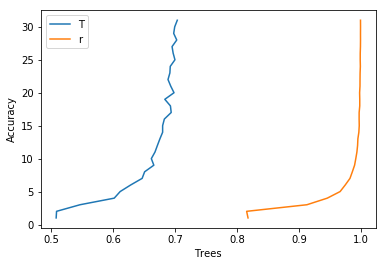

In [10]:
import matplotlib.pyplot as plt

print('Starting training:')

testscores = []
trainscores = []
x = []

for i in range(1,32):
    clf = RandomForestClassifier(n_estimators=i, max_depth=None,
                             verbose=False, n_jobs=8)
    clf.fit(x_train, y_train)
    
    testscores.append(clf.score(x_test, y_test))
    trainscores.append(clf.score(x_train, y_train))
    x.append(i)

plt.plot(x, testscores)
plt.legend('Test data')
plt.plot(x, trainscores)
plt.legend('Training data')
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.show()